In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = np.loadtxt('C:/Users/mrasskazov/Desktop/DS/Data/MNIST/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('C:/Users/mrasskazov/Desktop/DS/Data/MNIST/test.csv', delimiter=',', skiprows=1)

In [3]:
train_img=np.resize(train[:,1:], (42000,28, 28))
test_img=np.resize(test[:,1:], (42000,28, 28))
train_lable=train[:,0]

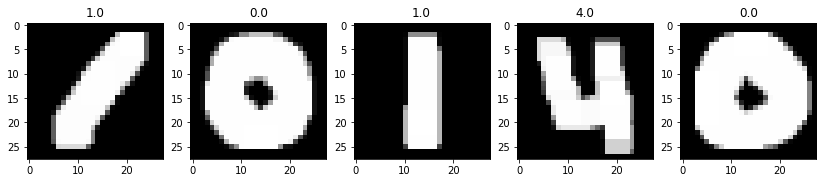

In [89]:
fig=plt.figure(figsize=(20,10))
for i, img in enumerate(train_img[0:5],1):
    kernel = np.ones((5,5),np.uint8)
    subplot=fig.add_subplot(1,7,i)
    plt.imshow(cv2.dilate(img,kernel,1), cmap='gray')
    subplot.set_title(train_lable[i-1])

In [104]:
train_sobel_x = np.zeros_like(train_img)
train_sobel_y = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(train_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

test_sobel_x = np.zeros_like(test_img)
test_sobel_y = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(test_img[i], cv2.CV_64F, dx=0, dy=1, ksize=3)
###    
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)
test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)
###
train_hist = np.zeros((len(train_img), 16))
for i in range(len(train_img)):
    hist, borders = np.histogram(train_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i])
    train_hist[i] = hist
    
test_hist = np.zeros((len(test_img), 16))
for i in range(len(test_img)):
    hist, borders = np.histogram(test_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i])
    test_hist[i] = hist
    
###

train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

In [95]:
train_sobel_x_i = np.zeros_like(train_img)
train_sobel_y_i = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x_i[i] = cv2.Sobel(cv2.dilate(train_img[i],kernel,1), cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y_i[i] = cv2.Sobel(cv2.dilate(train_img[i],kernel,1), cv2.CV_64F, dx=0, dy=1, ksize=3)

test_sobel_x_i = np.zeros_like(test_img)
test_sobel_y_i = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x_i[i] = cv2.Sobel(cv2.dilate(test_img[i],kernel,1), cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y_i[i] = cv2.Sobel(cv2.dilate(test_img[i],kernel,1), cv2.CV_64F, dx=0, dy=1, ksize=3)
###    
train_g_i, train_theta_i = cv2.cartToPolar(train_sobel_x_i, train_sobel_y_i)
test_g_i, test_theta_i = cv2.cartToPolar(test_sobel_x_i, test_sobel_y_i)
###
train_hist_i = np.zeros((len(train_img), 16))
for i in range(len(train_img)):
    hist, borders = np.histogram(train_theta_i[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g_i[i])
    train_hist_i[i] = hist
    
test_hist_i = np.zeros((len(test_img), 16))
for i in range(len(test_img)):
    hist, borders = np.histogram(test_theta_i[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g_i[i])
    test_hist_i[i] = hist
    
###

train_hist_i = train_hist_i / np.linalg.norm(train_hist_i, axis=1)[:, None]
test_hist_i = test_hist_i / np.linalg.norm(test_hist_i, axis=1)[:, None]

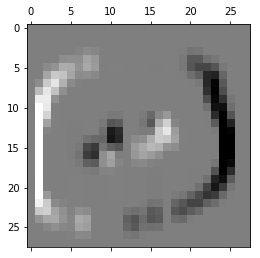

In [96]:
plt.matshow(test_sobel_x_i[1], cmap='gray')

In [97]:
train_hist_all=np.concatenate((train_hist,train_hist_i), axis=1)

In [98]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_val, y_train, y_val= train_test_split(train_hist_i, train_lable, test_size=0.2, random_state=42)

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
clf=KNeighborsClassifier().fit(X_train,y_train)

In [115]:
knn_pred=clf.predict(X_val)

In [116]:
clf.score(X_val,y_val)

0.72202380952380951

In [117]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [118]:
accuracy_score(y_val, knn_pred)

0.72202380952380951

In [119]:
print(classification_report(y_val, knn_pred))

             precision    recall  f1-score   support

        0.0       0.66      0.73      0.69       816
        1.0       0.95      0.95      0.95       909
        2.0       0.66      0.69      0.67       846
        3.0       0.57      0.70      0.63       937
        4.0       0.70      0.78      0.74       839
        5.0       0.60      0.56      0.58       702
        6.0       0.85      0.76      0.80       785
        7.0       0.86      0.77      0.81       893
        8.0       0.62      0.48      0.54       835
        9.0       0.77      0.76      0.77       838

avg / total       0.73      0.72      0.72      8400



In [120]:
print(confusion_matrix(y_val, knn_pred))

[[594   7  44  11  31  23  48   2  53   3]
 [  7 860   2   2  20   0   4   1   2  11]
 [ 41   2 580  97  13  83  13   1  12   4]
 [ 26   0  75 658  13  64   2  13  66  20]
 [ 35  13  19   6 658   4   7  22  22  53]
 [ 23   0  79 159  12 390   6   6  26   1]
 [ 65   7  36  12  26  22 596   0  21   0]
 [ 12   4  11  39  54  11   0 686  15  61]
 [ 81   5  28 142  51  47  22  22 402  35]
 [ 17   4  10  29  58   4   0  46  29 641]]


In [221]:
knn_pred_test=clf.predict(test_hist)

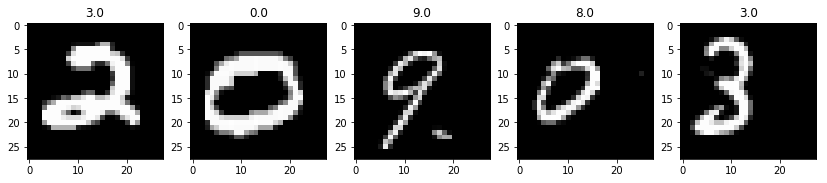

In [222]:
fig=plt.figure(figsize=(20,10))
for i, img in enumerate(test_img[0:5],1):
    subplot=fig.add_subplot(1,7,i)
    plt.imshow(img, cmap='gray')
    subplot.set_title(knn_pred_test[i-1])

In [143]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(knn_pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))